IMPORTING THE LIB

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

READING THE CSV FILE

In [2]:
df=pd.read_csv(r'transaction_data.csv',header=0)


####### total cost ### abs is the absolute value .taking both items and cost as positive


In [3]:

df['total_cost']=abs(df.NumberOfItemsPurchased)*abs(df.CostPerItem)    

CHECKING INFO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
 8   total_cost              1083818 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 74.4+ MB


DESCRIBING DATA

In [5]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,total_cost
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00,1.638027e+02
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03,5.532498e+04
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04,0.000000e+00
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00,1.557000e+01
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00,4.104000e+01
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00,7.344000e+01
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06,4.071085e+07


CHECKING THE NULL VALUE

In [6]:
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
total_cost                   0
dtype: int64

droping null value

In [7]:
unique_items=df['ItemDescription'].value_counts().reset_index()


In [8]:
#### list of unique items

In [9]:
unique_items.to_csv("frequency_unique_items.csv",header=True,index=False)

PER USER ID TRANSACTION AMOUNT

In [10]:
df_user=df[["UserId","TransactionId","total_cost"]]
a = df_user.groupby(['UserId', 'TransactionId']).sum()
b=a.groupby('UserId').mean()
b.reset_index(inplace=True)
b  
 ##### avg spending per user per transaction

,UserId,total_cost
0,-1,4607.321612
1,259266,641217.600000
2,259287,5108.485714
3,259308,3740.760000
4,259329,14571.840000
...,...,...
4368,383880,1497.300000
4369,383901,669.600000
4370,383922,496.900000
4371,383943,1086.877500


AVERAGE VALUE OF THE TOATAL_TARANSACTION AT USER LEVEL



MEAN: 21800

In [11]:
b.describe()

,UserId,total_cost
count,4373.000000,4.373000e+03
mean,321219.759890,2.180515e+04
std,36490.967253,1.231339e+06
min,-1.000000,0.000000e+00
25%,290052.000000,1.338732e+03
50%,321300.000000,2.051100e+03
75%,352338.000000,3.164844e+03
max,384027.000000,8.142170e+07


AVERAGE COST  PER TRANSACTION ID

In [12]:
df_transaction=df[["TransactionId","total_cost"]].groupby('TransactionId').sum().reset_index()
unique_tran_id=df_transaction['TransactionId'].count()
unique_tran_id
cost_per_transaction=df_transaction['total_cost'].sum()
cost_per_transaction
avg_cost_per_trans=cost_per_transaction/unique_tran_id
avg_cost_per_trans

6854.530297297297

AVERAGE COST PER TRANSACTION ID = 6266.15


AVERAGE COST PER TRANSACTION ID GIVES THE CRITERIA FOR THE SEGMENTATION/BINING

In [13]:
bins=pd.IntervalIndex.from_breaks([0,2000,4000,7000,22000,100000000],closed='left')
b['total_cost_bins'] = pd.cut(b['total_cost'],bins)

b['total_cost_bins'].unique()
b

,UserId,total_cost,total_cost_bins
0,-1,4607.321612,"[4000, 7000)"
1,259266,641217.600000,"[22000, 100000000)"
2,259287,5108.485714,"[4000, 7000)"
3,259308,3740.760000,"[2000, 4000)"
4,259329,14571.840000,"[7000, 22000)"
...,...,...,...
4368,383880,1497.300000,"[0, 2000)"
4369,383901,669.600000,"[0, 2000)"
4370,383922,496.900000,"[0, 2000)"
4371,383943,1086.877500,"[0, 2000)"


FREQUENCY OF EACH BINS  W.R.T USER ID FOR THE USER LEVEL EXPENENDITURE

In [14]:
but=b["total_cost_bins"].value_counts().to_frame().reset_index()
but

,index,total_cost_bins
0,"[0, 2000)",2120
1,"[2000, 4000)",1565
2,"[4000, 7000)",474
3,"[7000, 22000)",189
4,"[22000, 100000000)",25


LABELING THE BINS

In [15]:
but=but.drop(['total_cost_bins'],axis=1)
def bins(x):
    print(type(x))
    if x=="[0, 2000)" :
        return "low"
    elif x=="[2000, 4000)":
        return "below_avg"
    elif x=="[4000, 7000)":
        return "avg"
    elif x=="[7000, 22000)":
        return "above_avg"
    elif x=="[22000, 100000000)":
        return "high"
but['total_cost_bins']=but['index']

but['TRANSACTION_TYPE']=but.apply(lambda x: bins(str(x["index"])),axis=1)
but=but.drop(['index'],axis=1)
but

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


,total_cost_bins,TRANSACTION_TYPE
0,"[0, 2000)",low
1,"[2000, 4000)",below_avg
2,"[4000, 7000)",avg
3,"[7000, 22000)",above_avg
4,"[22000, 100000000)",high


MERGING THE LABELED BINS WITH THE USERID W.R.T NO.OF TRANSACTION



bNew is the dataframe for the userid w.r.t the type of transaction_amount like [LOW, AVG , BELOW_AVG, ABOVE_AVG ,HIGH]


In [16]:

b=b.drop(['total_cost'],axis=1)
bNew=b.merge(but,how='left',on="total_cost_bins")
bNew

,UserId,total_cost_bins,TRANSACTION_TYPE
0,-1,"[4000, 7000)",avg
1,259266,"[22000, 100000000)",high
2,259287,"[4000, 7000)",avg
3,259308,"[2000, 4000)",below_avg
4,259329,"[7000, 22000)",above_avg
...,...,...,...
4368,383880,"[0, 2000)",low
4369,383901,"[0, 2000)",low
4370,383922,"[0, 2000)",low
4371,383943,"[0, 2000)",low


NO OF TRANSACTION PER USER ID

In [17]:
df.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country',
       'total_cost'],
      dtype='object')





NO OF TRANSACTIONS PER USER ID

In [18]:
df_user=df[["UserId","TransactionId"]]

a1 = df_user.groupby(['UserId', 'TransactionId']).count().reset_index()

b1= a1.groupby(['UserId'])['TransactionId'].count().reset_index()

b1['noOfTrans']=b1["TransactionId"]
b1=b1.drop(["TransactionId"],axis=1)
b1

,UserId,noOfTrans
0,-1,3710
1,259266,2
2,259287,7
3,259308,4
4,259329,1
...,...,...
4368,383880,1
4369,383901,1
4370,383922,3
4371,383943,16


MEAN VALUE OF THE NO. of TRANSACTION PER USER

In [19]:
b1.describe()

,UserId,noOfTrans
count,4373.000000,4373.000000
mean,321219.759890,5.922708
std,36490.967253,56.798813
min,-1.000000,1.000000
25%,290052.000000,1.000000
50%,321300.000000,3.000000
75%,352338.000000,5.000000
max,384027.000000,3710.000000


CREATING THE INTERVALS/BINS FOR THE NO.OF TRANSACTIONS OF A USER

##### 5.9 IS THE MEAN VALUE FOT THE TOTAL NO OF TRANSACTION, [4,8) IS THE MEAN RANGE WHERE THE MEAN 5.9 LIES

In [20]:
bins=pd.IntervalIndex.from_breaks([1,2,4,8,100,4000],closed='left')
b1['noOfTrans_bins'] = pd.cut(b1['noOfTrans'],bins)

b1['noOfTrans_bins'].unique()
b1

,UserId,noOfTrans,noOfTrans_bins
0,-1,3710,"[100, 4000)"
1,259266,2,"[2, 4)"
2,259287,7,"[4, 8)"
3,259308,4,"[4, 8)"
4,259329,1,"[1, 2)"
...,...,...,...
4368,383880,1,"[1, 2)"
4369,383901,1,"[1, 2)"
4370,383922,3,"[2, 4)"
4371,383943,16,"[8, 100)"


##### 5.9 IS THE MEAN VALUE FOT THE TOTAL NO OF TRANSACTION, [4,8) IS THE MEAN RANGE WHERE THE MEAN 5.9 LIES

Frequency of each range

In [21]:
but=b1["noOfTrans_bins"].value_counts().to_frame().reset_index()
but
#but.drop(["noOfTrans_bins"])

,index,noOfTrans_bins
0,"[1, 2)",1313
1,"[2, 4)",1307
2,"[4, 8)",1018
3,"[8, 100)",728
4,"[100, 4000)",7


LABELING THE BINS

In [22]:
but=but.drop(['noOfTrans_bins'],axis=1)
def bins(x):
    print(type(x))
    if x=="[1, 2)" :
        return "low"
    elif x=="[2, 4)":
        return "below_avg"
    elif x=="[4, 8)":
        return "avg"
    elif x=="[8, 100)":
        return "above_avg"
    elif x=="[100, 4000)":
        return "high"
but['noOfTrans_bins']=but['index']

but['noOfTrans']=but.apply(lambda x: bins(str(x["index"])),axis=1)
but=but.drop(['index'],axis=1)
but

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


,noOfTrans_bins,noOfTrans
0,"[1, 2)",low
1,"[2, 4)",below_avg
2,"[4, 8)",avg
3,"[8, 100)",above_avg
4,"[100, 4000)",high


MERGING THE LABELEDBINS WITH THE USERID W.R.T NO.OF TRANSACTION




b11 is the dataframe for the userid w.r.t the type of transaction_number like [LOW, AVG , BELOW_AVG, ABOVE_AVG ,HIGH]

In [23]:
b1=b1.drop(['noOfTrans'],axis=1)
b11=b1.merge(but,how='left',on="noOfTrans_bins")
b11

,UserId,noOfTrans_bins,noOfTrans
0,-1,"[100, 4000)",high
1,259266,"[2, 4)",below_avg
2,259287,"[4, 8)",avg
3,259308,"[4, 8)",avg
4,259329,"[1, 2)",low
...,...,...,...
4368,383880,"[1, 2)",low
4369,383901,"[1, 2)",low
4370,383922,"[2, 4)",below_avg
4371,383943,"[8, 100)",above_avg


USER ID BASED ON THE TIME/HOUR OF THE DAY : DATAFRAME :f1

In [24]:
def getTimeOfDay(x):
    x = x.split(' ')
    return int(x[3].split(':')[0])



df_user1=df[["UserId","TransactionId", 'TransactionTime']]
a1 = df_user1.groupby(['UserId','TransactionId','TransactionTime']).count().reset_index()
a1['hourOfDay'] = a1.apply(lambda x: getTimeOfDay(x["TransactionTime"]),axis=1)
c1 = a1[['UserId','hourOfDay']]
c1

,UserId,hourOfDay
0,-1,7
1,-1,10
2,-1,10
3,-1,10
4,-1,10
...,...,...
25938,383943,8
25939,383943,8
25940,384027,6
25941,384027,6


In [25]:
c1.describe()

,UserId,hourOfDay
count,25943.000000,25943.000000
mean,274095.428709,8.738735
std,117127.785542,2.472368
min,-1.000000,2.000000
25%,273084.000000,7.000000
50%,308322.000000,9.000000
75%,346416.000000,11.000000
max,384027.000000,16.000000


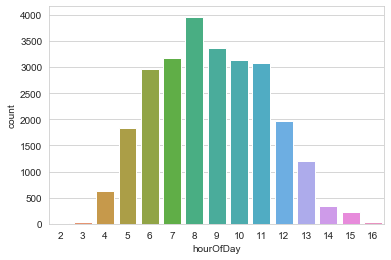

In [26]:
plt=sns.countplot(data=a1,x=a1['hourOfDay'].sort_values())

In [27]:
fig=plt.get_figure()
fig.savefig(r"C:\Users\Manoj Kumar Singh\Desktop\AmritanshuSingh_JIIT_1.png")  ####to save the png image of the graph

MAXIMUM BUYERS ARE IN THE RANGE [7,10]

In [28]:
bins=pd.IntervalIndex.from_breaks([1,7,10,13,20],closed='left')
c1['hours_bins'] = pd.cut(c1['hourOfDay'],bins)
d1=c1.drop('hourOfDay',axis=1)
d1

C:\Users\Manoj Kumar Singh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserId,hours_bins
0,-1,"[7, 10)"
1,-1,"[10, 13)"
2,-1,"[10, 13)"
3,-1,"[10, 13)"
4,-1,"[10, 13)"
...,...,...
25938,383943,"[7, 10)"
25939,383943,"[7, 10)"
25940,384027,"[1, 7)"
25941,384027,"[1, 7)"


In [29]:
d1['count']=int(1)
e1=d1.groupby(['UserId','hours_bins']).count().reset_index()
e1

,UserId,hours_bins,count
0,-1,"[1, 7)",569.0
1,-1,"[7, 10)",1087.0
2,-1,"[10, 13)",1625.0
3,-1,"[13, 20)",441.0
4,259266,"[1, 7)",2.0
...,...,...,...
17487,383943,"[13, 20)",1.0
17488,384027,"[1, 7)",3.0
17489,384027,"[7, 10)",NaN
17490,384027,"[10, 13)",NaN


USER ID BASED ON HOUR OF THE DAY (HOUR-BINS) : DATAFRAME : f1

In [30]:
#f1=e1.groupby(['UserId','count'])['hours_bins'].max().reset_index()





idx=e1.groupby(['UserId'])['count'].transform(max) == e1['count']
f1=e1[idx]
f1=f1.drop('count',axis=1)
f1

,UserId,hours_bins
2,-1,"[10, 13)"
4,259266,"[1, 7)"
10,259287,"[10, 13)"
12,259308,"[1, 7)"
16,259329,"[1, 7)"
...,...,...
17472,383880,"[1, 7)"
17476,383901,"[1, 7)"
17481,383922,"[7, 10)"
17485,383943,"[7, 10)"


USER ID BASED ON COUNTRY    :  DATAFRAME  : country

In [31]:
country=df[['UserId','Country']]
country=country.drop_duplicates(keep='first',inplace=False)

country


,UserId,Country
0,278166,United Kingdom
1,337701,United Kingdom
2,267099,France
3,380478,United Kingdom
4,-1,United Kingdom
...,...,...
822457,380961,United Kingdom
831373,366303,Canada
875968,329028,United Kingdom
949686,374766,United Kingdom


ANALYSIS ON WHEATHER A BUYER IS WEEKEND -SHOPPER OR WEEKDAY -SHOPPER USING DAY OF THE WEEK IN TRANSACTION TIME COLUMN

In [32]:
def getDayOfWeek(x):
    x = x.split(' ')                          ###### FUNCTION FOR FETCHING A DAY IN A ROW
    return str(x[0])



df_day=df[["UserId",'TransactionId',"TransactionTime"]]
df_day = df_day.groupby(['UserId','TransactionId','TransactionTime']).count().reset_index()
df_day['dayOfWeek'] = df_day.apply(lambda x: getDayOfWeek(x["TransactionTime"]),axis=1)
df_day = df_day[['UserId','dayOfWeek']]
df_day                                     ###########  TRANSACTION BASED ON DAY OF THE WEEK

,UserId,dayOfWeek
0,-1,Mon
1,-1,Mon
2,-1,Mon
3,-1,Mon
4,-1,Mon
...,...,...
25938,383943,Mon
25939,383943,Sun
25940,384027,Fri
25941,384027,Mon


#### SALES MOSTLY ON WEEKDAY

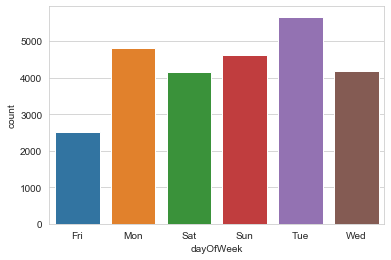

In [33]:


plt=sns.countplot(data=df_day,x=df_day['dayOfWeek'].sort_values())


In [35]:
fig=plt.get_figure()
fig.savefig(r"C:\Users\Manoj Kumar Singh\Desktop\AmritanshuSingh_JIIT_1_2.png")  ####to save the png image of the graph

In [36]:





def type_day(a):
    
    if a in ['Mon','Tue','Wed']:        
        return  'weekday'
    else:
        return 'weekend'

df_day['type_of_buyer']=df_day.apply(lambda x: type_day(x.dayOfWeek) ,axis=1)
        
df_day['type_of_buyer']


df_day=df_day.drop('dayOfWeek',axis=1)
df_day

,UserId,type_of_buyer
0,-1,weekday
1,-1,weekday
2,-1,weekday
3,-1,weekday
4,-1,weekday
...,...,...
25938,383943,weekday
25939,383943,weekend
25940,384027,weekend
25941,384027,weekday


type of buyer on the  user level id     : dataframe:      df_day1

In [37]:

df_day['count']=int(1)
df_day=df_day.groupby(['UserId','type_of_buyer']).count().reset_index()
df_day



idx=df_day.groupby(['UserId'])['count'].transform(max) == df_day['count']
df_day1=df_day[idx]
df_day1=df_day1.drop('count',axis=1)
df_day1

,UserId,type_of_buyer
0,-1,weekday
2,259266,weekend
3,259287,weekday
6,259308,weekend
7,259329,weekend
...,...,...
6653,383880,weekend
6654,383901,weekend
6655,383922,weekday
6657,383943,weekday


ANALYSIS OF A MONTH WHERE TRANSACTION IS HIGH 

In [38]:
def getMonthOfYear(x):
    x = x.split(' ')
    return str(x[1])

In [39]:
df_month=df[['TransactionId',"TransactionTime"]]
df_month = df_month.groupby(['TransactionId','TransactionTime']).count().reset_index()
df_month['MonthOfYear'] = df_month.apply(lambda x: getMonthOfYear(x["TransactionTime"]),axis=1)
df_month = df_month[['TransactionId','MonthOfYear']]
df_month





,TransactionId,MonthOfYear
0,5900015,Feb
1,5900026,Feb
2,5900037,Feb
3,5900048,Feb
4,5900059,Feb
...,...,...
25938,6397413,Feb
25939,6397424,Feb
25940,6397435,Feb
25941,6397446,Feb


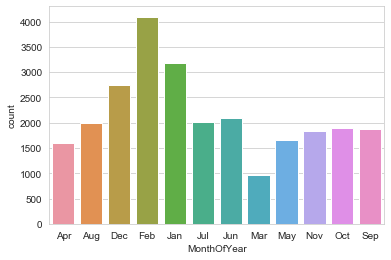

In [40]:



plt=sns.countplot(data=df_month,x=df_month['MonthOfYear'].sort_values())

######  DEC -FEB IS THE PEAK MONTHS OF THE TRANSACTION

In [41]:

fig=plt.get_figure()
fig.savefig(r"C:\Users\Manoj Kumar Singh\Desktop\AmritanshuSingh_JIIT_1_3.png")  ####to save the png image of the graph

In [42]:

dataF1=bNew.merge(b11,how='left',on='UserId')
dataF2=dataF1.merge(f1,how='left',on='UserId')
dataF3=dataF2.merge(country,how='left',on='UserId')  #df_day1
dataF4=dataF3.merge(df_day1,how='left',on='UserId')
dataF4

,UserId,total_cost_bins,TRANSACTION_TYPE,noOfTrans_bins,noOfTrans,hours_bins,Country,type_of_buyer
0,-1,"[4000, 7000)",avg,"[100, 4000)",high,"[10, 13)",United Kingdom,weekday
1,-1,"[4000, 7000)",avg,"[100, 4000)",high,"[10, 13)",Switzerland,weekday
2,-1,"[4000, 7000)",avg,"[100, 4000)",high,"[10, 13)",Hong Kong,weekday
3,-1,"[4000, 7000)",avg,"[100, 4000)",high,"[10, 13)",France,weekday
4,-1,"[4000, 7000)",avg,"[100, 4000)",high,"[10, 13)",EIRE,weekday
...,...,...,...,...,...,...,...,...
6298,383880,"[0, 2000)",low,"[1, 2)",low,"[1, 7)",United Kingdom,weekend
6299,383901,"[0, 2000)",low,"[1, 2)",low,"[1, 7)",United Kingdom,weekend
6300,383922,"[0, 2000)",low,"[2, 4)",below_avg,"[7, 10)",United Kingdom,weekday
6301,383943,"[0, 2000)",low,"[8, 100)",above_avg,"[7, 10)",United Kingdom,weekday


In [50]:
dataF4['noOfTrans'].value_counts()

below_avg    2606
avg          1420
low          1313
above_avg     949
high           15
Name: noOfTrans, dtype: int64

In [51]:
dataF4.to_csv("output_feature_engineer.csv",header=True,index=False)    ##### giving th requred path 